In [45]:
import numpy as np



def gradStep(x, grad, stepSize):
    return x - stepSize*grad(x)


# in general
def descAlgs(x, step, direction):
    return x - step * direction

def NewtonStep(x, grad, Hessian, stepSize):
    try:
        d = np.linalg.inv(Hessian(x)) @ grad(x) # np.linalg.solve(Hessian(x), grad(x))
    except Exception:
        print(Exception)
        d = np.zeros(x.shape)
    return x - stepSize*d
    
    #return x - stepSize * np.linalg.inv(Hessian(x)) @ grad(x)

In [37]:
steps = 10000
stepSize = 0.01
x0 = np.array([100,50])

def f(x):
    return 100*x[0]**2+x[1]**2

def gradF(x):
    return np.array([200*x[0], 2*x[1]])

def HessianF(x):
    return np.array([[200, 0], [0, 2]])
x = x0
for i in range(steps):
    x = gradStep(x, gradF, stepSize)

print(x)
stepSize = 0.1
x = x0
for i in range(steps):
    x = NewtonStep(x, gradF, HessianF, stepSize)

print(x)

[1.00000000e+02 9.11437576e-87]
[0. 0.]


$f(x) = (a-x_1)^2 + b(x_2-x_1^2)^2

$\nabla f(x) = \begin{pmatrix}-2(a-x_1) - 4x_1b(x_2-x_1^2) \\ 2b(x_2 - x_1^2)\end{pmatrix}$

$\nabla^2 f(x) = \begin{pmatrix} -2 -(4b(x_2-x_1^2) + 8bx_1^2) && -4bx_1 \\
-4bx_1 && 2b \end{pmatrix}$

In [38]:
import numpy as np
import matplotlib.pyplot as plt


In [39]:
# initial definition of function and gradients

def Rosenbrock(x, a=1, b=100):
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

def RosenbrockFast(x, y, a=1, b=100):
    return Rosenbrock(np.array([x,y]), a, b)


def RosenbrockGrad(x, a=1, b=100):
    return np.array([-2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2), 2*b*(x[1]-x[0]**2)])

def RosenbrockFastGrad(x, y, a=1, b=100):
    return RosenbrockGrad(np.array([x,y]), a, b)

def RosenbrockHessian(x, a=1, b=100):
    return np.matrix([
        [2 - 4*b*(x[1]-3*x[0]**2), -4*b*x[0]],
        [-4*b*x[0], 2*b]
    ])

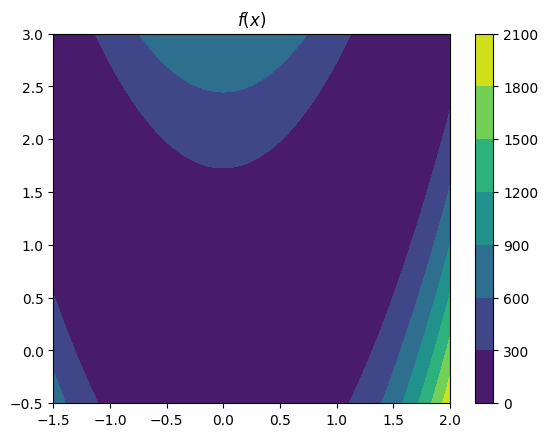

In [40]:
# Countour plot of fA(x)
x = np.linspace(-1.5, 2, 1000)
y = np.linspace(-0.5, 3, 1000)
X, Y = np.meshgrid(x, y)
Z = RosenbrockFast(X,Y)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('$f(x)$')
plt.show()

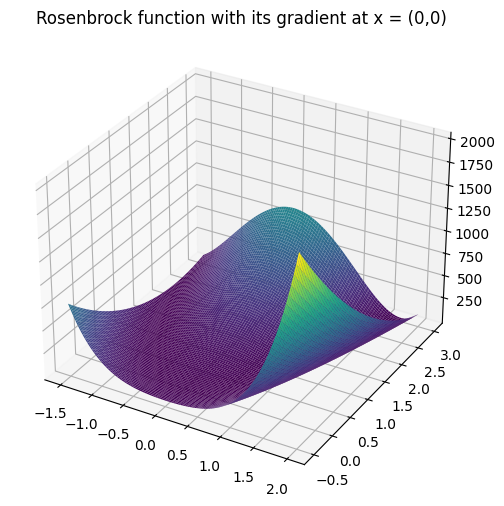

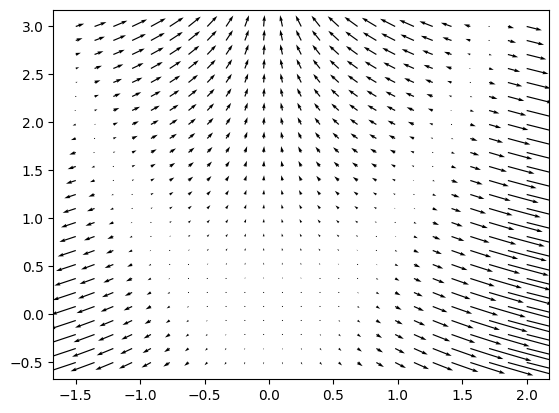

In [41]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


x1 = np.linspace(-1.5, 2, 100)
x2 = np.linspace(-0.5, 3, 100)
X, Y = np.meshgrid(x1,x2)
Z = RosenbrockFast(X,Y)


ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Rosenbrock function with its gradient at x = (0,0)')
plt.show()
x1 = np.linspace(-1.5, 2, 25)
x2 = np.linspace(-0.5, 3, 25)
XGrad, YGrad = np.meshgrid(x1,x2)
grads = RosenbrockFastGrad(XGrad,YGrad)
plt.quiver(XGrad, YGrad, grads[0,:,:], grads[1,:,:])
plt.show()

In [42]:
numPoints = 30

X,Y = np.meshgrid(np.linspace(-1.5, -2, numPoints), np.linspace(-0.5, -3,numPoints))
stepSizes = [0.05, 0.01, 0.005,0.001, 0.0005, 0.0001]


for stepSize in stepSizes:
    for x0 in ((np.random.uniform(-1.5, 2),np.random.uniform(-0.5, 3)) for x in range(numPoints)):
        x = np.ones((150001, 2))
        x[0] = x0
        for i in range(150000):
            #print(x[i])
            i = i+1
            x[i] = gradStep(x[i-1], RosenbrockGrad, stepSize)
            if np.linalg.norm(RosenbrockGrad(x[i])) < 0.001:
                break
        print(f"We got from {x[0]} to {x[i]} in {i} steps and decreased the value from {Rosenbrock(x[0])} to {Rosenbrock(x[i])} while using stepsize {stepSize}")

C:\Users\st3ph\AppData\Local\Temp\ipykernel_18708\423340406.py:11: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2), 2*b*(x[1]-x[0]**2)])
C:\Users\st3ph\AppData\Local\Temp\ipykernel_18708\1394510238.py:6: RuntimeWarning: invalid value encountered in subtract
  return x - stepSize*grad(x)


We got from [0.31637647 1.0468232 ] to [nan nan] in 150000 steps and decreased the value from 90.09694586927127 to nan while using stepsize 0.05
We got from [-0.91425012  1.35461516] to [nan nan] in 150000 steps and decreased the value from 30.57574257136362 to nan while using stepsize 0.05
We got from [-0.70502913  0.82463932] to [nan nan] in 150000 steps and decreased the value from 13.637547155686764 to nan while using stepsize 0.05


C:\Users\st3ph\AppData\Local\Temp\ipykernel_18708\423340406.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([-2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2), 2*b*(x[1]-x[0]**2)])


We got from [-0.99288745  1.05702474] to [nan nan] in 150000 steps and decreased the value from 4.478533583733401 to nan while using stepsize 0.05
We got from [0.88446787 1.68187151] to [nan nan] in 150000 steps and decreased the value from 80.9392226711128 to nan while using stepsize 0.05
We got from [0.57925676 2.43473003] to [nan nan] in 150000 steps and decreased the value from 440.83757612780323 to nan while using stepsize 0.05
We got from [1.73934418 2.21228378] to [nan nan] in 150000 steps and decreased the value from 66.64912254767776 to nan while using stepsize 0.05
We got from [0.25684453 2.21234976] to [nan nan] in 150000 steps and decreased the value from 461.24726713123596 to nan while using stepsize 0.05
We got from [1.63254267 0.19194559] to [nan nan] in 150000 steps and decreased the value from 612.0966658546553 to nan while using stepsize 0.05
We got from [1.34827867 2.92891657] to [nan nan] in 150000 steps and decreased the value from 123.56699587335547 to nan while u

In [46]:
numPoints = 50

#X,Y = np.meshgrid(np.linspace(-1.5, -2, numPoints), np.linspace(-0.5, -3,numPoints))
stepSizes = [1, 0.9, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]


for stepSize in stepSizes:
    for x0 in ((np.random.uniform(-1.5, 2),np.random.uniform(-0.5, 3)) for x in range(numPoints)):
        x = np.ones((150001, 2))
        x[0] = x0
        for i in range(150000):

            i = i+1
            x[i] = NewtonStep(x[i-1], RosenbrockGrad, RosenbrockHessian, stepSize)
            if np.linalg.norm(RosenbrockGrad(x[i])) < 0.001 or np.linalg.norm(x[i]-x[i-1])==0:
                break
        print(f"We got from {x[0]} to {x[i]} in {i} steps and decreased the value from {Rosenbrock(x[0])} to {Rosenbrock(x[i])} while using stepsize {stepSize}")

We got from [-1.0084238   2.49909442] to [1. 1.] in 5 steps and decreased the value from 223.71829732522585 to 1.5713306467781332e-20 while using stepsize 1
We got from [-1.37799772  0.40642886] to [1. 1.] in 5 steps and decreased the value from 228.3952315076219 to 4.002324513875552e-19 while using stepsize 1
We got from [-0.99563167  0.9480264 ] to [0.99991685 0.99983371] in 12 steps and decreased the value from 4.169654159281473 to 6.913315896042683e-09 while using stepsize 1
We got from [0.91007512 2.95170676] to [0.9999995  0.99999899] in 3 steps and decreased the value from 450.92058659361345 to 2.526968023065064e-13 while using stepsize 1
We got from [-1.1654042   1.11923998] to [0.99980308 0.99960619] in 5 steps and decreased the value from 10.397584379664872 to 3.877874637698354e-08 while using stepsize 1
We got from [0.44463068 1.58146918] to [0.99955536 0.99911092] in 3 steps and decreased the value from 191.79113326827485 to 1.9770167178752169e-07 while using stepsize 1
We 

In [44]:
import numpy as np
x = np.ones((150001, 2))
x[0] = [0,2]
stepSize = 0.001
for i in range(150000):
    print(x[i])
    i = i+1
    x[i] = NewtonStep(x[i-1], RosenbrockGrad, RosenbrockHessian, 1)
    if np.linalg.norm(RosenbrockGrad(x[i])) < 0.001:
        break
print("finished", x[i], i)

[0. 2.]
[-0.00250627  0.        ]
[ 0.99874216 -0.00501251]
[0.9987484  0.99749837]
finished [1.         0.99999843] 4
